## 잠재 요인 협업 필터링
: 행렬 분해 기법을 활용해 잠재 요인을 추출하고, 잠재 요인을 기반으로 사용자에게 아이템을 추천
<br><img src=https://blog.kakaocdn.net/dn/eTd4Ob/btrGRHFom7J/LSZKMb9HQy24eA2FLJ8Qt0/img.png width=1000>

### 잠재 요인 협업 필터링의 이해
: 잠재 요인을 뭐라고 특정하긴 어렵다. 예시로, 영화의 잠재요인이 genre라고 가정할 때,<br>
사용자 레벨의 잠재요인(이 가정에선 영화 장르별 선호도)과 아이템 레벨의 잠재요인(영화의 장르별 평점)
<br><img src=https://blog.kakaocdn.net/dn/lqP7w/btrGQ6yeUXs/PK59ilHWK9a6a65OncCNUk/img.png width=1000>

-> 넷플릭스 추천 엔진 경연대회에서 1위 부터 상위권은 대부분 잠재 요인 협업 필터링을 사용했다

### 행렬 분해 (잠재 요인 협업 필터링)
: 사용자-아이템 평점 행렬을 P(사용자-잠재 요인)행렬과 Q(잠재 요인-아이템)행렬로 분해<br>
-> 이를 재 결합하여 밀집 행렬 형태의 사용자-아이템 평점 행렬을 생성 -> 사용자에게 새로운 아이템 추천<br>
<br><img src=https://blog.kakaocdn.net/dn/b5ZpAl/btrGQpeCHMv/rVVpnvIaDyPpEKomKwtqek/img.png width=1000>

#### 행렬분해 -> 내적 -> 재결합
<br><img src=https://blog.kakaocdn.net/dn/cAtDpX/btrGTx26J2o/dGMwlWprkuiEUHTqDt8DiK/img.png width=1000>

#### User1 - Item1 평점 예측
내적을 통해 기존에 4점이었던 점수 -> 0.94*1.7 + 0.96*2.49 = 3.9884 예측
<br><img src=https://blog.kakaocdn.net/dn/cK4ngS/btrGTxIOBmq/tBHgXJhbOfwwZyR5w5WBS0/img.png width=1000>

### 잠재 요인 기반 행렬분해
<br><img src=https://blog.kakaocdn.net/dn/o7oHo/btrGQp6Nd5c/WGukiBVpPxqyspVbh6CWN1/img.png width=1000>

#### 개별 Row, Column의 의미
1. 개별 Row: 개별 사용자에 대한 잠재 요인
2. 개별 COlumn: 개별 아이템에 대한 잠재 요인
<br><img src=https://blog.kakaocdn.net/dn/OnR17/btrGS5sgWzr/N26DYOYKvrwTkDBsVVjhSK/img.png width=1000>

#### 행렬 분해를 통한 평점 예측
User2의 Item4에 대한 예측 (실제3인데 2.97로 매우 유사)
<br><img src=https://blog.kakaocdn.net/dn/yY55c/btrGRkp6b9K/W9giIzWwQOOVkBu5Tx6shk/img.png width=1000>
<br>
User2의 Item3에 대한 예측 (실제 없는 값에 대한 예측) -> 3.02
<br><img src=https://blog.kakaocdn.net/dn/caCfPu/btrGSy2wyVT/TK7orRrkJjuqkDHh6aDK8k/img.png width=1000>

### 사용자-아이템 평점 행렬 분해 이슈
: SVD는 Missing Value가 없는 행렬에 대해서 적용되지, 실제론 Missing Value가 존재할 수 밖에 없는데 어떻게 행렬분해하는가?<br>
경사하강법을 이용하여 P와 Q에 기반한 예측R 값이 실제R 값과 근사해지도록 하는 방향<br>
<br><img src=https://blog.kakaocdn.net/dn/kCXOB/btrGQpTgpx9/UGWpxh9B7FZkYYoYNFkT40/img.png width=1000>

### 경사하강법 기반 행렬 분해
1. P와 Q를 임의의 값을 가진 행렬로 설정 (보통 0으로된 행렬로 시작)
2. P와 Q.T 값을 곱해 예측 R행렬 계산 - 실제 R행렬과 차이(오류) 계산
3. 이 오류를 최소화 하도록 P,Q를 적절히 업데이트
4. 오류가 최소가 되도록 2,3 반복<br>
<br><img src=https://blog.kakaocdn.net/dn/dMUlgt/btrGQZNkjoK/GUsYhiuUgukljNRIhn5w0K/img.png width=1000>

### 경사하강법 기반 행렬분해 비용 함수
- 실제값과 예측값의 차이(오류)의 합을 최소화 -> 이것만 하면 과적합되기 쉽다.
- 과적합 개선을 위한 L2 규제
<br><img src=https://blog.kakaocdn.net/dn/v8pPy/btrGP5HwSta/jrZ1SKvJHek4UQ7jkLEuhk/img.png width=1000>

### 경사하강법 기반의 행렬분해 업데이트 식
예측R행렬과 실제R행렬 값의 차이를 최소화하는 방향으로 P행렬과 Q행렬 업데이트 수식<br>
<br><img src=https://blog.kakaocdn.net/dn/uAIYH/btrGP4u2ApJ/X2T4xPFU9JhPDyGuvvWvi0/img.png width=1000>

## 경사하강을 이용한 행렬 분해 실습

### 경사하강법 구현 간단 예제
**원본 행렬 R 및 R을 분해할 P와 Q를 임의의 정규분포를 가진 랜덤값으로 초기화**

In [24]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정. 
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ], # NaN값 -> 예측할 값
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])

num_users, num_items = R.shape
K=3 # 잠재요소(Latent Factor)는 3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K)) # P(4,3): 임의의 정규분포를 가진 랜덤값
Q = np.random.normal(scale=1./K, size=(num_items, K)) # Q(5,3): 임의의 정규분포를 가진 랜덤값
print(f"{P = }")
print(f"{Q = }")
print(f"{R.shape=}, {P.shape=}, {Q.T.shape=}")

P = array([[ 0.54144845, -0.2039188 , -0.17605725],
       [-0.35765621,  0.28846921, -0.76717957],
       [ 0.58160392, -0.25373563,  0.10634637],
       [-0.08312346,  0.48736931, -0.68671357]])
Q = array([[-0.1074724 , -0.12801812,  0.37792315],
       [-0.36663042, -0.05747607, -0.29261947],
       [ 0.01407125,  0.19427174, -0.36687306],
       [ 0.38157457,  0.30053024,  0.16749811],
       [ 0.30028532, -0.22790929, -0.04096341]])
R.shape=(4, 5), P.shape=(4, 3), Q.T.shape=(3, 5)


#### 예측행렬 생성 및 비용계산 함수 생성

**비용계산 함수를 생성. 분해된 행렬 P와 Q.T를 내적하여 예측 행렬 생성하고**

**실제 행렬에서 널이 아닌 값의 위치에 있는 값만 예측 행렬의 값과 비교하여 RMSE값을 계산하고 반환**

In [25]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T) # -> 예측행렬(full_pred_matrix)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind] # NaN아닌 원본 행렬
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind] # NaN아닌 예측 행렬
    # 원본 R 행렬에서 NaN이 아닌 위치에 대해 예측 R 행렬과 mse 계산
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

#### 경사하강으로 P,Q 업데이트
<div>
**경사하강법에 기반하여 P와 Q의 원소들을 업데이트 수행**<br>
    <img src=attachment:image.png width=1000>
</div>
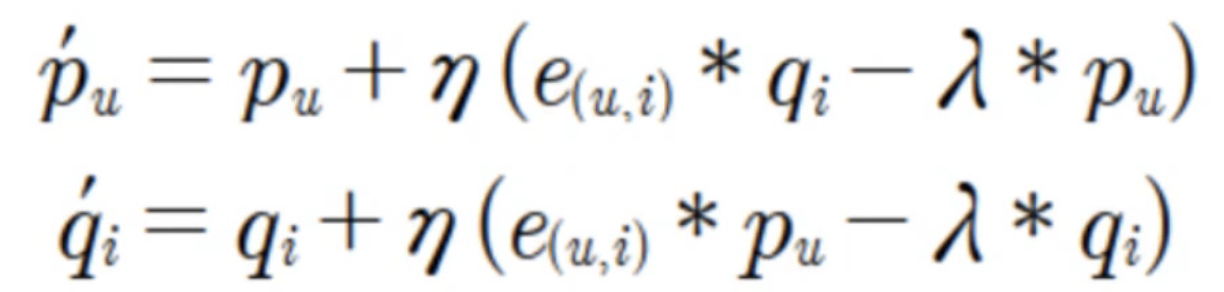

In [26]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
print(f"{num_users=}, {num_items=}")
# non_zeros 구하기
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000 # 반복 횟수
learning_rate=0.01 # 학습율
r_lambda=0.01 # 위 수식에서 람다(L2 Regularization 계수)

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps):
    for i, j, r in non_zeros: # non_zeros 마다
        # 실제 값과 예측 값의 차이인 -> 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T) # eij: 실제값 예측값 차이
        # Regularization을 반영한 SGD 업데이트 공식 적용 (위 수식)
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 : # 50step 마다 rmse 출력
        print("### iteration step : ", step," rmse : ", rmse)

num_users=4, num_items=5
### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369647
### iteration step :  100  rmse :  0.15643403848192458
### iteration step :  150  rmse :  0.07455141311978064
### iteration step :  200  rmse :  0.043252267985793146
### iteration step :  250  rmse :  0.029248328780879226
### iteration step :  300  rmse :  0.022621116143829507
### iteration step :  350  rmse :  0.019493636196525232
### iteration step :  400  rmse :  0.018022719092132773
### iteration step :  450  rmse :  0.01731968595344283
### iteration step :  500  rmse :  0.016973657887570985
### iteration step :  550  rmse :  0.01679680459589558
### iteration step :  600  rmse :  0.016701322901884634
### iteration step :  650  rmse :  0.016644736912476574
### iteration step :  700  rmse :  0.016605910068210012
### iteration step :  750  rmse :  0.01657420047570488
### iteration step :  800  rmse :  0.01654431582921612
### iteration step :  850  rmse :  0

#### P와 Q.T 결합해서 예측 행렬 R 확인

In [29]:
# P와 Q.T 결합해서 예측 행렬 R 확인
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))
print(f"원래 행렬\n{R=}")

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
원래 행렬
R=array([[ 4., nan, nan,  2., nan],
       [nan,  5., nan,  3.,  1.],
       [nan, nan,  3.,  4.,  4.],
       [ 5.,  2.,  1.,  2., nan]])


### 행렬 분해 기반의 잠재 요인 협업 필터링 실습

#### **경사하강법 기반의 행렬 분해 함수 생성**
-> 앞 간단 예제에서 진행한 코드를 하나의 함수로 생성

In [31]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

#### 영화 ratings 데이터 로드

In [47]:
import pandas as pd
import numpy as np

movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]

# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
# 안본 영화 0점으로
ratings_matrix.fillna(0, inplace=True)

In [48]:
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 예측 평점 행렬 만들기

In [33]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.29608182991810134
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.2248750327526985
### iteration step :  70  rmse :  0.20685455302331537
### iteration step :  80  rmse :  0.19413418783028683
### iteration step :  90  rmse :  0.184700820027204
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.1716522696470749
### iteration step :  120  rmse :  0.1669518194687172
### iteration step :  130  rmse :  0.1630529219199754
### iteration step :  140  rmse :  0.1597669192967964
### iteration step :  150  rmse :  0.15695986999457318
### iteration step :  160  rmse :  0.15453398186715428
### iteration step :  170  rmse :  0.1524161855107764
### iteration step :  180  rmse :

In [36]:
## 예측 평점 행렬을 보기 좋게, DataFrame으로
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


#### 9.2에서 사용한 함수 재정의
1. get_unseen_movies: 사용자 입력 -> 안본 영화 반환(평점 매기지 않은 영화)
2. recomm_movie_by_userid: 사용자가 안본 영화중 예측 평점 높은 top_n개 영화 반환

In [41]:
## 사용자 입력해주면, 그 사용자가 안본 영화 반환
def get_unseen_movies(ratings_matrix, userId): 
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    user_rating = ratings_matrix.loc[userId,:] # userID로 사용자 평점정보 가져오기
    # user_rating이 0보다 크면 기존에 관람한 영화 -> user_rating이 0인 경우 관람하지 않은 영화
    unseen_list = user_rating[ user_rating == 0].index.tolist()
    return unseen_list

## 사용자의 안본 영화중 top_n개 만큼 예측 평점 높은 영화 추천
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies    

#### 잠재요인 기반 협업 필터링으로 영화 추천

In [49]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 잠재요인 기반 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690
